In [1]:
# import packages and data

import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from time import time
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

val_features = pd.read_csv('./x_val_features_02.csv')
val_labels = pd.read_csv('./y_val_labels_02.csv')
test_features = pd.read_csv('./x_test_features_02.csv')
test_labels = pd.read_csv('./y_test_labels_02.csv')

In [2]:
# import models

models = {}
for mdl in ['LR', 'SVM', 'MLP', 'RF', 'GBM']:
    models[mdl] = joblib.load(f'./{mdl}_model.pkl')

In [3]:
# define functions

def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy=round(accuracy_score(labels, pred), 3)
    precision=round(precision_score(labels, pred), 3)
    recall=round(recall_score(labels, pred), 3)
    print(f'Model: {name} -- Accuracy: {accuracy} | Precision: {precision} | Recall: {recall} | Latency {round((end-start)*1000,1)}ms')
    plot_conf_mat(model, features, labels)
    
    
def plot_conf_mat(model, features, labels):
    pred = model.predict(features)
    cm = confusion_matrix(labels, pred, labels=model.classes_)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['non-inhibitor', 'inhibitor'])
    
    disp.plot()
    plt.show()

Model: LR -- Accuracy: 0.723 | Precision: 0.707 | Recall: 0.676 | Latency 3.1ms


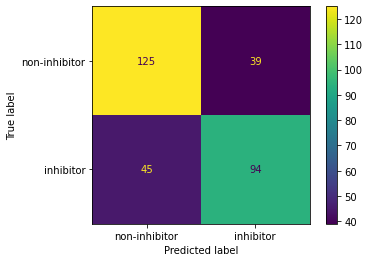

Model: SVM -- Accuracy: 0.766 | Precision: 0.73 | Recall: 0.777 | Latency 15.7ms


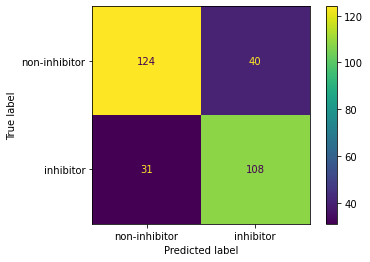

Model: MLP -- Accuracy: 0.733 | Precision: 0.704 | Recall: 0.719 | Latency 3.1ms


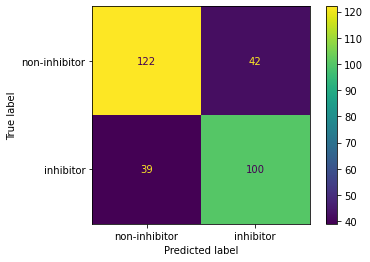

Model: RF -- Accuracy: 0.818 | Precision: 0.818 | Recall: 0.777 | Latency 21.3ms


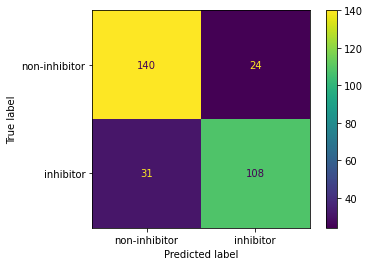

Model: GBM -- Accuracy: 0.789 | Precision: 0.774 | Recall: 0.763 | Latency 2.6ms


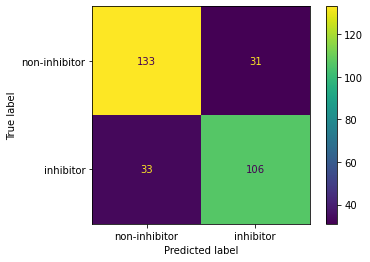

In [4]:
# validate models

for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

In [5]:
# Check feature importance

data = list(zip(models['RF'].feature_names_in_, models['RF'].feature_importances_))
df_importances = pd.DataFrame(data, columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
df_importances

,Feature,Importance
11,Maximal electrotopological positive variation ...,0.150058
12,topo_combined,0.127143
13,zagreb_combined,0.097859
14,connectivity_combined,0.093651
6,Mean Square Distance Balaban (MSDB),0.090680
4,ssssC_Avg,0.086571
5,Total structure connectivity (TSC),0.070060
9,Molecule cyclized degree (MCD),0.066323
1,aasC_Cnt,0.057837
3,ALOGP4 (ALOGP4),0.055002
